ANN PYTORCH CLASSIFICATION

Epoch 1/10, Loss: 0.5632, Training Accuracy: 85.75%
Epoch 1/10, Test Accuracy: 91.01%
Epoch 2/10, Loss: 0.3036, Training Accuracy: 91.26%
Epoch 2/10, Test Accuracy: 92.48%
Epoch 3/10, Loss: 0.2561, Training Accuracy: 92.61%
Epoch 3/10, Test Accuracy: 93.38%
Epoch 4/10, Loss: 0.2233, Training Accuracy: 93.69%
Epoch 4/10, Test Accuracy: 94.16%
Epoch 5/10, Loss: 0.1981, Training Accuracy: 94.40%
Epoch 5/10, Test Accuracy: 94.62%
Epoch 6/10, Loss: 0.1779, Training Accuracy: 94.97%
Epoch 6/10, Test Accuracy: 95.25%
Epoch 7/10, Loss: 0.1618, Training Accuracy: 95.46%
Epoch 7/10, Test Accuracy: 95.39%
Epoch 8/10, Loss: 0.1481, Training Accuracy: 95.80%
Epoch 8/10, Test Accuracy: 95.82%
Epoch 9/10, Loss: 0.1364, Training Accuracy: 96.16%
Epoch 9/10, Test Accuracy: 96.07%
Epoch 10/10, Loss: 0.1269, Training Accuracy: 96.46%
Epoch 10/10, Test Accuracy: 96.24%


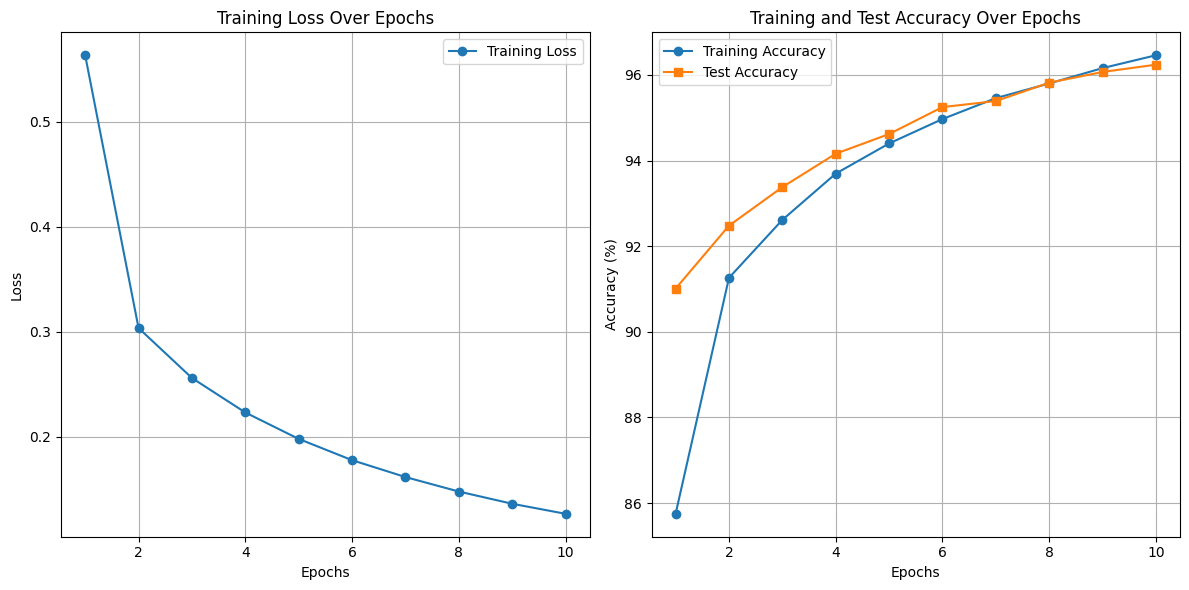

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data Transformation and Loading
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = torchvision.datasets.MNIST(
    root='./data', train=True, transform=data_transform, download=True)
test_data = torchvision.datasets.MNIST(
    root='./data', train=False, transform=data_transform, download=True)

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define the model using PyTorch's nn.Module
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):  
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Output layer (logits)
        return x

# Model Initialization
input_dim = 28 * 28  # Flattened image size (28x28 pixels)
hidden_dim = 128
output_dim = 10  # 10 classes for MNIST digits
model = SimpleNN(input_dim, hidden_dim, output_dim)

# Optimizer and Loss Function
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Variables to store metrics for graphing
train_losses = []
train_accuracies = []
test_accuracies = []

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    cumulative_loss = 0
    correct_preds = 0
    total_samples = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero gradients before each backward pass
        
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update weights and biases
        
        predictions = torch.argmax(outputs, dim=1)  # Get predicted labels
        correct_preds += (predictions == labels).sum().item()
        total_samples += labels.size(0)
        cumulative_loss += loss.item()

    # Calculate epoch metrics
    avg_loss = cumulative_loss / len(train_loader)
    train_accuracy = 100 * correct_preds / total_samples
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_accuracy:.2f}%")

# Plot Training and Test Metrics
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()

# Plot Training and Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy", marker="o")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Test Accuracy Over Epochs")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

ANN PyTorch Regression

Epoch 1/10, Train Loss: 1.7698, Test Loss: 0.4982
Epoch 2/10, Train Loss: 0.4561, Test Loss: 0.4655
Epoch 3/10, Train Loss: 0.4307, Test Loss: 0.4412
Epoch 4/10, Train Loss: 0.4174, Test Loss: 0.4304
Epoch 5/10, Train Loss: 0.4105, Test Loss: 0.4190
Epoch 6/10, Train Loss: 0.4094, Test Loss: 0.4276
Epoch 7/10, Train Loss: 0.4148, Test Loss: 0.4064
Epoch 8/10, Train Loss: 0.3901, Test Loss: 0.4035
Epoch 9/10, Train Loss: 0.3867, Test Loss: 0.4038
Epoch 10/10, Train Loss: 0.4042, Test Loss: 0.3982


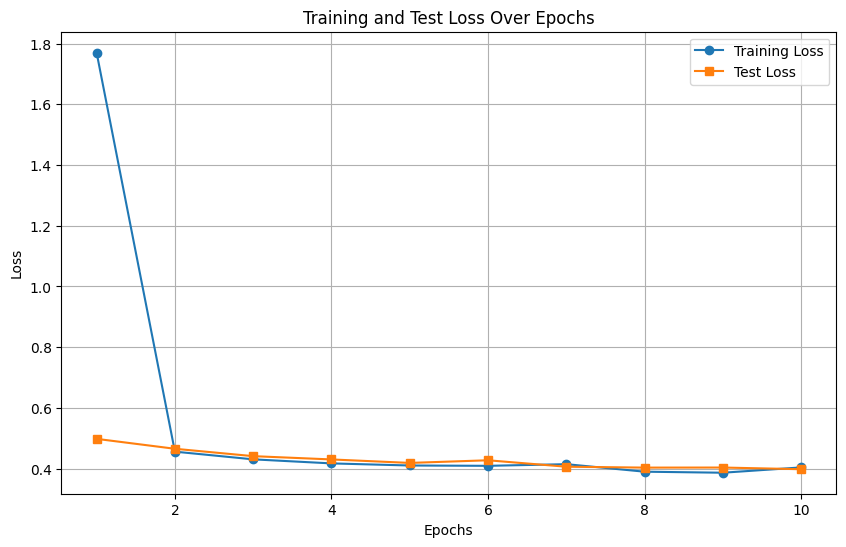

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim

# Load and preprocess the California Housing dataset
data = fetch_california_housing()
inputs, targets = data.data, data.target

# Standardize inputs
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_features = torch.tensor(X_train, dtype=torch.float32)
train_targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
test_features = torch.tensor(X_test, dtype=torch.float32)
test_targets = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Prepare DataLoaders
train_data = DataLoader(TensorDataset(train_features, train_targets), batch_size=64, shuffle=True)
test_data = DataLoader(TensorDataset(test_features, test_targets), batch_size=64, shuffle=False)

# Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):  
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model parameters
input_size = train_features.shape[1]
hidden_size = 128
output_size = 1

# Instantiate model, loss function, and optimizer
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Variables to store loss for plotting
train_losses = []
test_losses = []

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, targets in train_data:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Record average training loss for this epoch
    avg_train_loss = total_loss / len(train_data)
    train_losses.append(avg_train_loss)

    # Evaluate on the test dataset
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for features, targets in test_data:
            outputs = model(features)
            loss = criterion(outputs, targets)
            total_test_loss += loss.item() * targets.size(0)

    avg_test_loss = total_test_loss / len(test_data.dataset)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Plot training and test losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

CNN PYTORCH CLASSIFICATION

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8817 - loss: 0.4125 - val_accuracy: 0.9704 - val_loss: 0.0959
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9792 - loss: 0.0686 - val_accuracy: 0.9810 - val_loss: 0.0661
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9832 - val_loss: 0.0577
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9922 - loss: 0.0275 - val_accuracy: 0.9853 - val_loss: 0.0506
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9944 - loss: 0.0188 - val_accuracy: 0.9859 - val_loss: 0.0555
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 0.9840 - val_loss: 0.0571
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.9853 - val_loss: 0.0548
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9978 - loss: 0.0070 - v

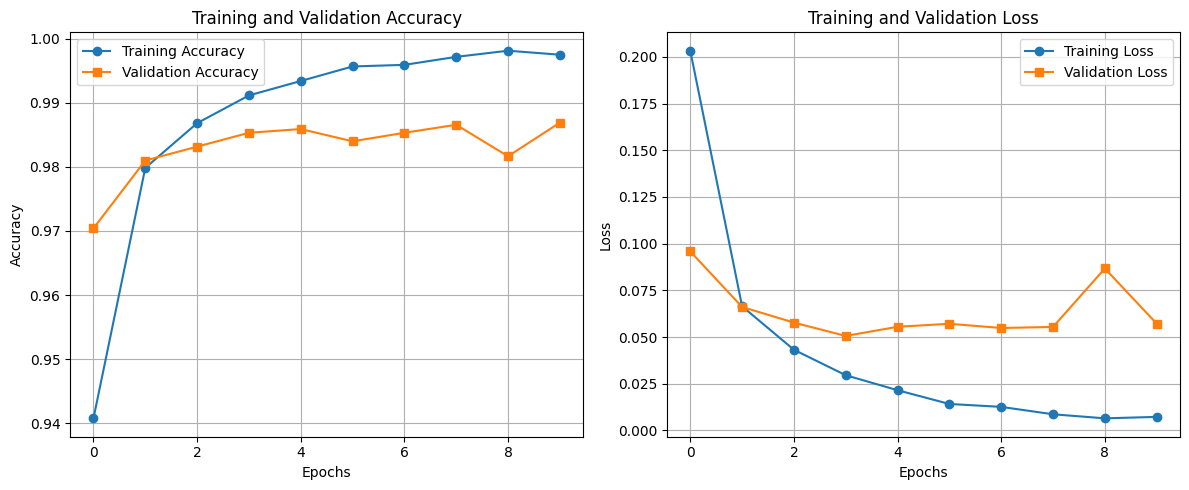

In [8]:



import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()